# Feature selection
- Often a model can be limited by the amount of features and their relevancy, algo's struggle with data that has too many dimensions

    This is called the <b> cures of dimensionality </b>
- If successful this can reduce the cost and increase accuracy

- Video tutorial followed: https://www.youtube.com/watch?v=iJ5c-XoHPFo

<b> example with the boston housing dataset </b>

(Although i acknowledge that this dataset is problematic and that we should be aware of what data we are using and the effects)

In [47]:
import warnings
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
warnings.filterwarnings('ignore', 'UserWarning')

In [48]:
import sklearn as sk

In [49]:
from sklearn.datasets import load_boston
boston_data = load_boston()
import pandas as pd
import numpy as np

In [50]:
boston= pd.DataFrame(boston_data.data, columns= boston_data.feature_names)
boston['MEDV'] = boston_data.target
#The next line puts RAD as type category ( catagorical var)

dummies = pd.get_dummies(boston.RAD)
boston= boston.drop(columns='RAD').merge(dummies, left_index=True, right_index= True)
X = boston.drop(columns='MEDV')
y= boston.MEDV

In [51]:
boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,MEDV,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,24.0
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,...,24.0,1,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,...,21.6,0,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,...,34.7,0,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,...,33.4,0,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,...,36.2,0,0,1,0,0,0,0,0,0
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,222.0,18.7,...,28.7,0,0,1,0,0,0,0,0,0
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,311.0,15.2,...,22.9,0,0,0,0,1,0,0,0,0
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,311.0,15.2,...,27.1,0,0,0,0,1,0,0,0,0
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,311.0,15.2,...,16.5,0,0,0,0,1,0,0,0,0
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,311.0,15.2,...,18.9,0,0,0,0,1,0,0,0,0


In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from math import sqrt

In [52]:
cv = KFold(n_splits=10, random_state=0, shuffle=True)

classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10)) 

y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)



In [54]:
print("RSME:" + str(round(sqrt(mean_squared_error(y,y_pred)))))
print("R_Squared: " + str(round(r2_score(y,y_pred),2)))

RSME:5
R_Squared: 0.66


We are looking for vals that don't have much varience ( don't change much in their vals. )
If the val is very low, it's unlikley that they will be good for prediction wheras high-varience can often be explaining whats going on in the data

In [35]:
boston.var()

CRIM          73.986578
ZN           543.936814
INDUS         47.064442
CHAS           0.064513
NOX            0.013428
RM             0.493671
AGE          792.358399
DIS            4.434015
TAX        28404.759488
PTRATIO        4.686989
B           8334.752263
LSTAT         50.994760
MEDV          84.586724
1.0            0.038039
2.0            0.045271
3.0            0.069597
4.0            0.170469
5.0            0.175968
6.0            0.048840
7.0            0.032532
8.0            0.045271
24.0           0.193198
dtype: float64

so here we could drop CHAS and NOX

In [55]:
X=X.drop(columns= ['NOX', 'CHAS'])

In [72]:
y_pred= cross_val_predict(classifier_pipeline, X, y, cv=cv)
print("RSME:" + str(round(sqrt(mean_squared_error(y,y_pred)))))
print("R_Squared: " + str(round(r2_score(y,y_pred),2)))

RSME:5
R_Squared: 0.69


In [57]:
import seaborn as sn
import matplotlib.pyplot as plt


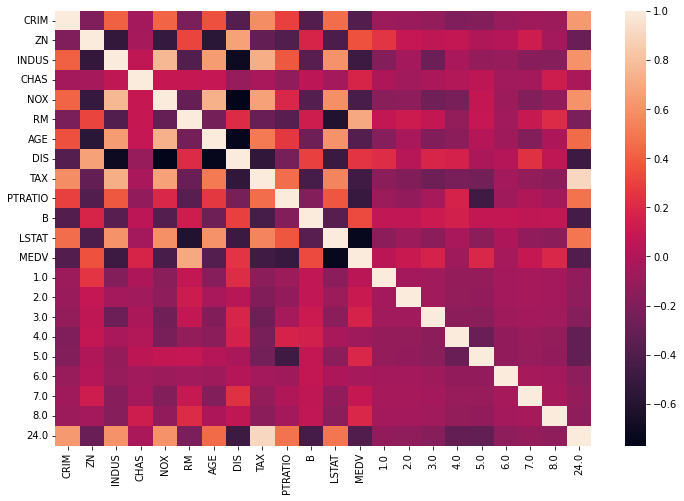

In [58]:
fig_dims=(12,8)
fig,ax = plt.subplots(figsize=fig_dims)
sn.heatmap(boston.corr(), ax=ax)
plt.show()

In [59]:
abs(boston.corr()["MEDV"])

CRIM       0.388305
ZN         0.360445
INDUS      0.483725
CHAS       0.175260
NOX        0.427321
RM         0.695360
AGE        0.376955
DIS        0.249929
TAX        0.468536
PTRATIO    0.507787
B          0.333461
LSTAT      0.737663
MEDV       1.000000
1.0        0.040453
2.0        0.104444
3.0        0.167352
4.0        0.065711
5.0        0.187356
6.0        0.039411
7.0        0.092802
8.0        0.190053
24.0       0.396297
Name: MEDV, dtype: float64

In [61]:
abs(boston.corr()["MEDV"])[abs(boston.corr()["MEDV"])>0.5].drop("MEDV").index.tolist()

['RM', 'PTRATIO', 'LSTAT']

In [74]:
vals= [0.1, 0.2, 0.3, 0.4 , 0.5, 0.6, 0.7]
for val in vals:
    features= abs(boston.corr()["MEDV"][abs(boston.corr()["MEDV"]) >val].drop('MEDV')).index.tolist()

    X= boston.drop(columns='MEDV')
    X=X[features]
    
    print(features)

    y_pred= cross_val_predict(classifier_pipeline, X, y, cv=cv)

# print("RSME:" + str(round(sqrt(mean_squared_error(X,y_pred)),2)))
   # print("R_squared: " + str(round(r2_score(y,y_pred),2)))
   #couldnt get the print val to sodding work but basically removes some at a time

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 2.0, 3.0, 5.0, 8.0, 24.0]
['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 24.0]
['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'B', 'LSTAT', 24.0]
['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']
['RM', 'PTRATIO', 'LSTAT']
['RM', 'LSTAT']
['LSTAT']


This rate the features by correlation, knows out feature that is not as correlated

Next up at 15:00 is Feature selection usign a wrapper